Load the Fashion_retail_dataset


In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_excel("/content/retail_fashion_dataset.xlsx")
df.head()


Saving retail_fashion_dataset.xlsx to retail_fashion_dataset.xlsx


,CustomerID,Gender,Age,Location,Membership,AnnualIncome,ProductCategory,AmountSpent,ItemsPurchased,SatisfactionRating,Returned,PaymentMethod
0,1,Male,33,Dhaka,Platinum,573959,Accessories,3878.15,0,3,Yes,COD
1,2,Other,18,Dhaka,Regular,1282335,Traditional Wear,2753.63,3,3,No,COD
2,3,Female,35,Sylhet,Platinum,1103278,Bottoms,3591.77,4,4,No,Nagad
3,4,Female,38,Sylhet,Platinum,920423,Accessories,3863.37,4,2,No,Nagad
4,5,Male,37,Dhaka,Gold,814407,Traditional Wear,3335.53,5,2,No,Nagad


Data Cleaning & Preprocessing:
1. Check for Missing Values, Outliers, and Inconsistent Data.
2. Perform necessary data type conversions.
3. Handle categorical variables appropriately (e.g., encoding if needed).

In [ ]:
#Checking Missing Values
df.isnull().sum()


,0
CustomerID,0
Gender,0
Age,0
Location,0
Membership,0
AnnualIncome,0
ProductCategory,0
AmountSpent,0
ItemsPurchased,0
SatisfactionRating,0


In [ ]:
#Checking duplicate values
df.duplicated().sum()

np.int64(0)

There is no missing values or duplicate values in the dataset


In [ ]:
#Checking outliers for numeric columns like Age, AnnualIncome, AmountSpent

Q1 = df['AmountSpent'].quantile(0.25)
Q3 = df['AmountSpent'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['AmountSpent'] < lower_bound) | (df['AmountSpent'] > upper_bound)]
print("Number of Outliers in AmountSpent:", outliers.shape[0])

Number of Outliers in AmountSpent: 4


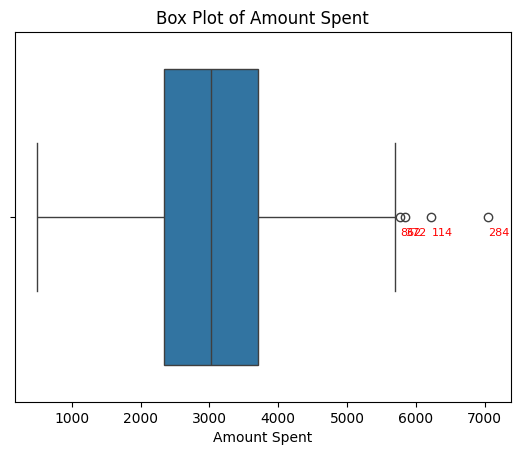

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['AmountSpent'])
plt.title('Box Plot of Amount Spent')
plt.xlabel('Amount Spent')

#Annotate each outliers with customer id
for index ,row in outliers.iterrows():
  plt.text(x=row['AmountSpent'], y=0.05, s=str(row['CustomerID']),fontsize=8, color= 'red')
plt.show()

In [ ]:
#Checking outliers for Age
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = df[(df['Age']<lower_bound) | (df['Age']>upper_bound)]
print("Number of Outliers in Age:", outliers.shape[0])

Number of Outliers in Age: 1


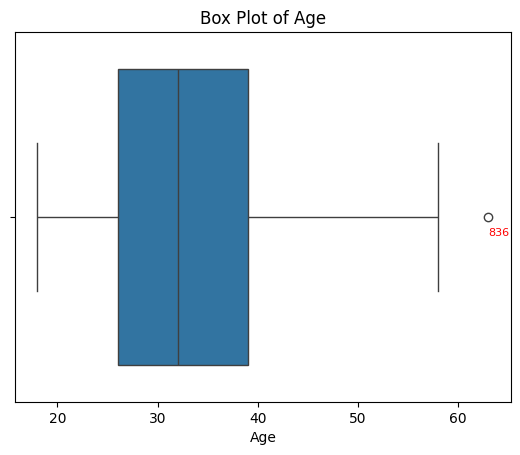

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')

#Annotate each outliers with customer id
for index ,row in outliers.iterrows():
  plt.text(x=row['Age'], y=0.05, s=str(row['CustomerID']),fontsize=8, color= 'red')
plt.show()

In [ ]:
#Checking outliers for AnnualIncome
Q1 = df['AnnualIncome'].quantile(0.25)
Q3 = df['AnnualIncome'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = df[(df['AnnualIncome']<lower_bound) | (df['AnnualIncome']>upper_bound)]
print("Number of Outliers in Annual Income:", outliers.shape[0])

Number of Outliers in Annual Income: 6


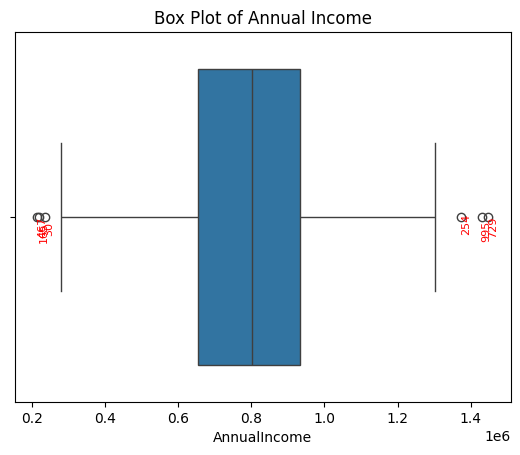

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.boxplot(x=df['AnnualIncome'])
plt.title('Box Plot of Annual Income')
plt.xlabel('AnnualIncome')

#Annotate each outliers with customer id
for index ,row in outliers.iterrows():
  y_jitter = np.random.uniform(0.02, 0.08)
  plt.text(x=row['AnnualIncome'], y=y_jitter, s=str(row['CustomerID']),fontsize=8, color= 'red', rotation= 90)
plt.show()

Check for Inconsistent categorical data (Gender, Location, Membership, ProductCategory , PaymentMethod)


In [ ]:
#Checking unique values for categories
df['Gender'].unique()
df['Location'].unique()
df['Membership'].unique()
df['ProductCategory'].unique()
df['PaymentMethod'].unique()


array(['COD', 'Nagad', 'Debit Card', 'bKash', 'Credit Card'], dtype=object)

In [ ]:
#Checking inconsistent for numeric
df[df['AnnualIncome'] < 0]      # invalid income
df[df['ItemsPurchased'] < 0]    # should not be negative
df[df['Age'] < 0]               # invalid age
df[df['AmountSpent'] < 0]       # invalid amount spent


,CustomerID,Gender,Age,Location,Membership,AnnualIncome,ProductCategory,AmountSpent,ItemsPurchased,SatisfactionRating,Returned,PaymentMethod


There is no inconsistent data in the dataset


Perform data type conversions


In [ ]:
df.dtypes


,0
CustomerID,int64
Gender,object
Age,int64
Location,object
Membership,object
AnnualIncome,int64
ProductCategory,object
AmountSpent,float64
ItemsPurchased,int64
SatisfactionRating,int64


In [ ]:
#Convert Categorical variables
categorical_cols = ['Gender','Location' ,'Membership', 'ProductCategory', 'PaymentMethod','Returned']
for col in categorical_cols:
    df[col] = df[col].astype('category')

Label Encoding(if ordinal like Membership)

In [ ]:
membership_map = {'Regular':5, 'Bronze': 4, 'Silver': 3, 'Gold': 2, 'Platinum': 1}
df['MembershipEncoded'] = df['Membership'].map(membership_map)


Lable Encoding or Mapping


In [ ]:
#for gender
gender_map = {'Female':0, 'Male':1, 'Other':2}
df['GenderEncoded'] = df['Gender'].map(gender_map)


In [ ]:
#for PaymentMethod
payment_map = {'Cash':0, 'Credit Card':1, 'Debit Card':2, 'COD':3, 'bKash':4, 'Nagad':5 }
df['PaymentMethodEncoded'] = df['PaymentMethod'].map(payment_map)

In [ ]:
#for ProductCategory
product_map = {'Accessories':0, 'Traditional Wear':1, 'Bottoms':2, 'Tops':3, 'Shoes':4 }
df['ProductCategoryEncoded'] = df['ProductCategory'].map(product_map)

In [ ]:
from google.colab import data_table

data_table.DataTable(df)  # Replace with df if unencoded

,CustomerID,Gender,Age,Location,Membership,AnnualIncome,ProductCategory,AmountSpent,ItemsPurchased,SatisfactionRating,Returned,PaymentMethod,MembershipEncoded,GenderEncoded,PaymentMethodEncoded,ProductCategoryEncoded
0,1,Male,33,Dhaka,Platinum,573959,Accessories,3878.15,0,3,Yes,COD,1,1,3,0
1,2,Other,18,Dhaka,Regular,1282335,Traditional Wear,2753.63,3,3,No,COD,5,2,3,1
2,3,Female,35,Sylhet,Platinum,1103278,Bottoms,3591.77,4,4,No,Nagad,1,0,5,2
3,4,Female,38,Sylhet,Platinum,920423,Accessories,3863.37,4,2,No,Nagad,1,0,5,0
4,5,Male,37,Dhaka,Gold,814407,Traditional Wear,3335.53,5,2,No,Nagad,2,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Male,18,Chattogram,Regular,575301,Shoes,3025.29,5,2,No,Nagad,5,1,5,4
996,997,Other,25,Khulna,Regular,848576,Bottoms,2418.40,3,2,No,Credit Card,5,2,1,2
997,998,Male,31,Rangpur,Gold,383580,Tops,1488.30,2,4,No,Credit Card,2,1,1,3
998,999,Other,27,Rajshahi,Gold,910629,Traditional Wear,1153.46,0,3,No,Nagad,2,2,5,1


Exploratory Data Analysis (EDA):
1. Descriptive statistics for numerical columns.
2. Univariate Analysis:
    i) Histograms (e.g., Age, AmountSpent)
   ii) Box Plots (e.g., AmountSpent by Gender or Membership)
   iii) Bar Charts for categorical variables (e.g., ProductCategory, PaymentMethod)

In [ ]:
df.describe()

,CustomerID,Age,AnnualIncome,AmountSpent,ItemsPurchased,SatisfactionRating
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,500.500000,32.796000,7.975050e+05,3038.726240,3.022000,3.031000
std,288.819436,9.254298,2.043810e+05,998.296348,1.765399,1.421992
min,1.000000,18.000000,2.141100e+05,500.000000,0.000000,1.000000
25%,250.750000,26.000000,6.532608e+05,2342.557500,2.000000,2.000000
50%,500.500000,32.000000,8.015055e+05,3024.135000,3.000000,3.000000
75%,750.250000,39.000000,9.330095e+05,3707.177500,4.000000,4.000000
max,1000.000000,63.000000,1.448618e+06,7052.550000,11.000000,5.000000


Based on the descriptive statistics, the customer base has an average age of 32.8 years and a wide income range, with a mean income of approximately $798,000.  Most customers buy 2–4 items per purchase, spending around $3,000. The average satisfaction rating is slightly above 3, indicating moderate satisfaction. These metrics suggest a fairly young and economically diverse customer group, with potential for targeted marketing and product optimization.

Univariate Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

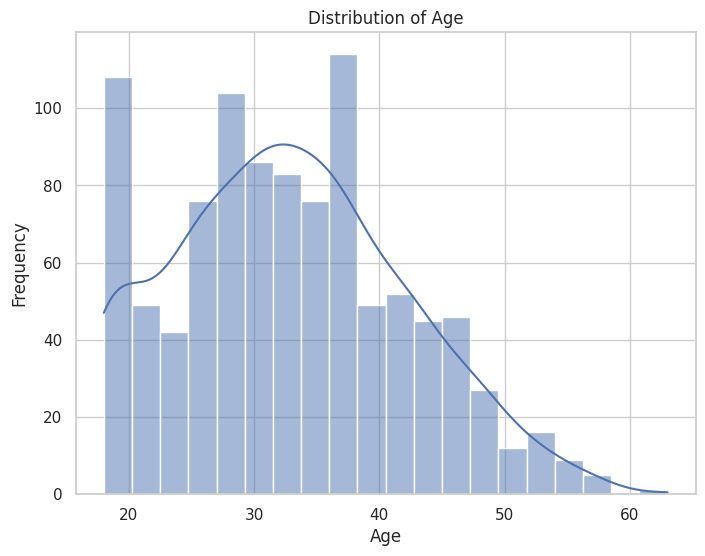

In [ ]:
#Histogram
##For Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The age distribution is fairly symmetric or slightly right-skewed, with most customers falling in the 26–39 age range. The mean (32.8) is close to the median (32), indicating minimal skewness.

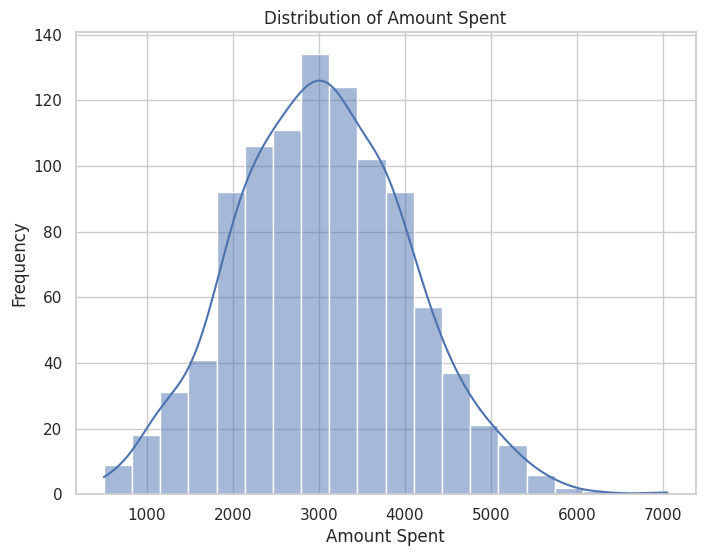

In [ ]:
##for AmountSpent

plt.figure(figsize=(8,6))
sns.histplot(df['AmountSpent'], bins=20, kde=True)
plt.title('Distribution of Amount Spent')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
plt.show()

The amount spent distribution is symmetric. This means, every customer's spending habits on an average 3038.72.

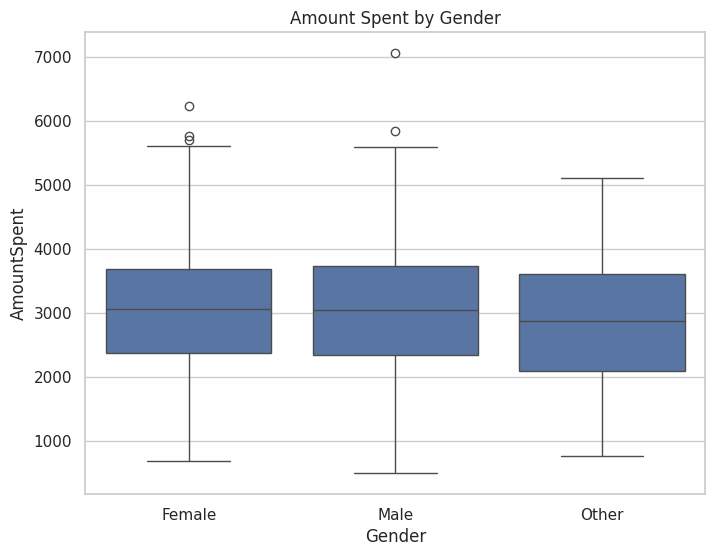

In [ ]:
#Box Plot

plt.figure(figsize=(8,6))
sns.boxplot(x='Gender', y='AmountSpent', data=df)
plt.title('Amount Spent by Gender')
plt.show()

There is no different spending habits for different geneder. The amount spent by male and female are symmetric to each other but other's has different spending habits.


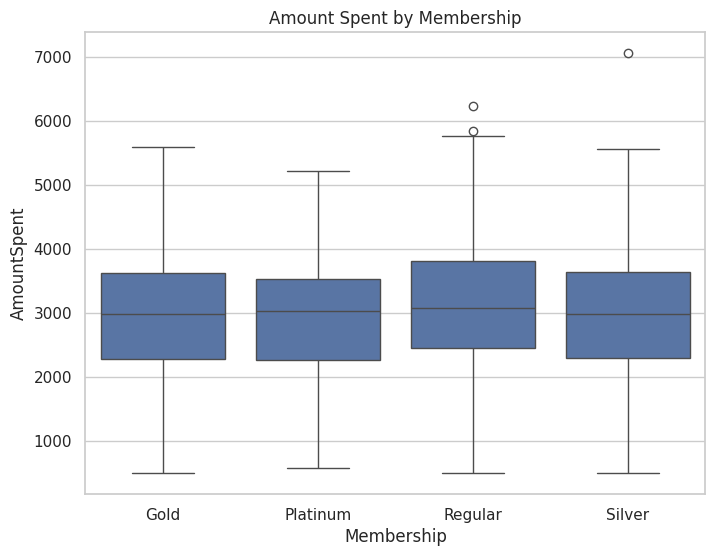

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Membership', y='AmountSpent', data=df)
plt.title('Amount Spent by Membership')
plt.show()

The distribution of spending is relatively consistent across all membership levels, with Regular members showing slightly higher variability and outliers. This indicates that even non-premium customers may spend heavily, challenging the assumption that premium membership always correlates with higher spending.Gold and Silver members are quite similar.

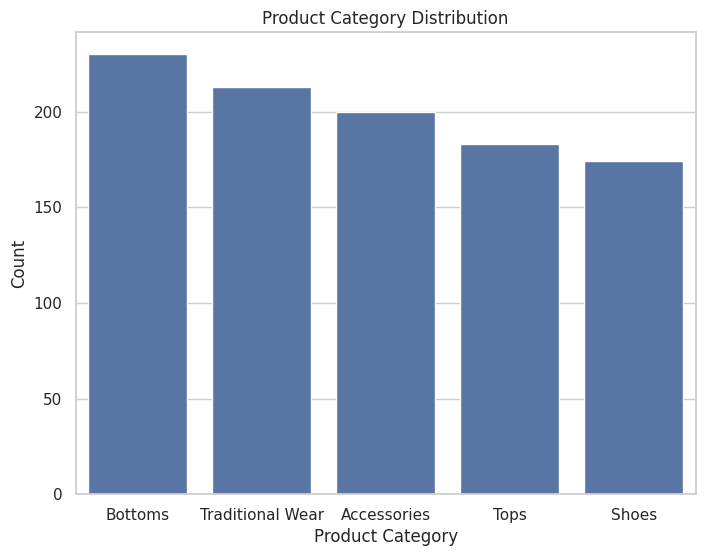

In [ ]:
#Box plot for categorical data
##for ProductCategory

plt.figure(figsize=(8,6))
sns.countplot(x='ProductCategory', data=df, order=df['ProductCategory'].value_counts().index)
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

Customers tend to purchase bottoms more frequently compared to other product categories, while shoes are the least purchased item.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

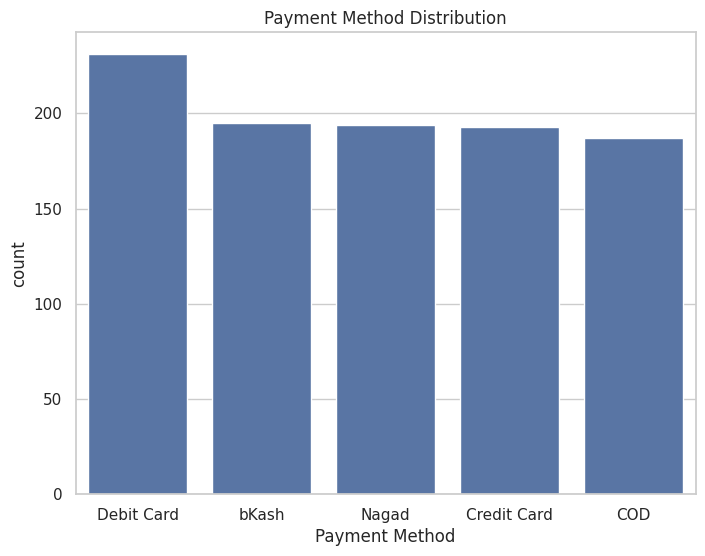

In [ ]:
##for PaymentMethod

plt.figure(figsize=(8,6))
sns.countplot(x='PaymentMethod', data=df, order=df['PaymentMethod'].value_counts().index)
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt

Customers are more likely to pay their bills by debit card and other payment methods are equally used.

Bivariate Analysis:
1. Correlation Matrix and Heatmap for numeric variables.
2. Cross-tabulation (e.g., Gender vs. Returned, Membership vs. SatisfactionRating).
3. Box plots comparing AmountSpent across different Membership levels or ProductCategories

In [ ]:
#correlation matrix

correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,CustomerID,Age,AnnualIncome,AmountSpent,ItemsPurchased,SatisfactionRating
CustomerID,1.000000,-0.012405,0.010031,0.006504,-0.052345,-0.001342
Age,-0.012405,1.000000,-0.001926,0.017111,0.005605,0.031973
AnnualIncome,0.010031,-0.001926,1.000000,0.004665,-0.013215,0.001100
AmountSpent,0.006504,0.017111,0.004665,1.000000,0.019347,0.003234
ItemsPurchased,-0.052345,0.005605,-0.013215,0.019347,1.000000,0.000127
SatisfactionRating,-0.001342,0.031973,0.001100,0.003234,0.000127,1.000000


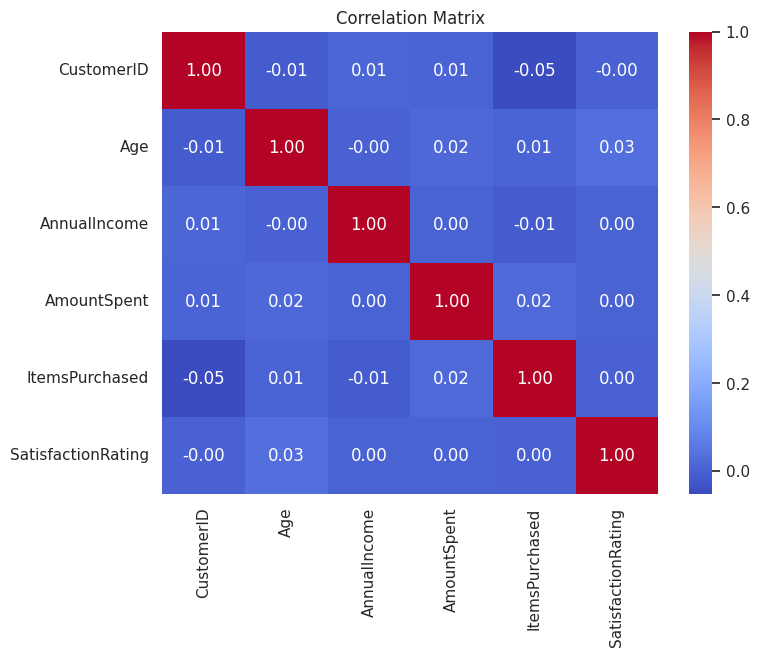

In [ ]:
#Heatmap for numeric variable
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Correlation-Matrix shows that Age, AmountSpent, AnnualIncome, ItemsPurchased, SatisfactionRating all have very weak linear relationship with others. There is a very weak negative linear relationship between age vs annualincome and annualincome vs itemspurchased.


In [ ]:
#Cross-Tabulation(Category vs Category)
##gender vs returned

pd.crosstab(df['Gender'], df['Returned'], normalize= 'index')*100

Returned,No,Yes
Gender,,
Female,84.965831,15.034169
Male,85.683297,14.316703
Other,84.000000,16.000000


From this cross-tabulation , we can see that other are more likely to return products than male and female but the amount is not very scattered , they are close to each other.


In [ ]:
#membership vs satisfactionrating

pd.crosstab(df['Membership'], df['SatisfactionRating'], normalize= 'index')*100

SatisfactionRating,1,2,3,4,5
Membership,,,,,
Gold,20.095694,18.660287,18.181818,22.488038,20.574163
Platinum,26.315789,18.947368,23.157895,15.789474,15.789474
Regular,17.813765,21.255061,17.611336,21.457490,21.862348
Silver,18.811881,23.267327,15.841584,21.782178,20.297030


Gold and Regular members show better overall satisfaction.

Platinum members surprisingly have the highest dissatisfaction (1-star).

Silver members lean toward lower satisfaction ratings, possibly due to fewer benefits or poorer experiences.

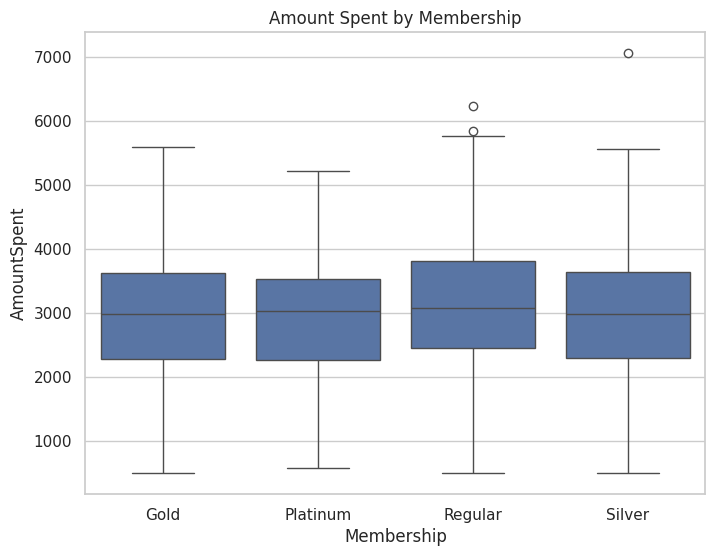

In [ ]:
# Box Plots (AmountSpent vs. Membership/ProductCategory)
##AmountSpent vs Membership

plt.figure(figsize=(8,6))
sns.boxplot(x='Membership', y='AmountSpent', data=df)
plt.title('Amount Spent by Membership')
plt.show()

The distribution of spending is relatively consistent across all membership levels, with Regular members showing slightly higher variability and outliers. This indicates that even non-premium customers may spend heavily, challenging the assumption that premium membership always correlates with higher spending.Gold and Silver members are quite similar.

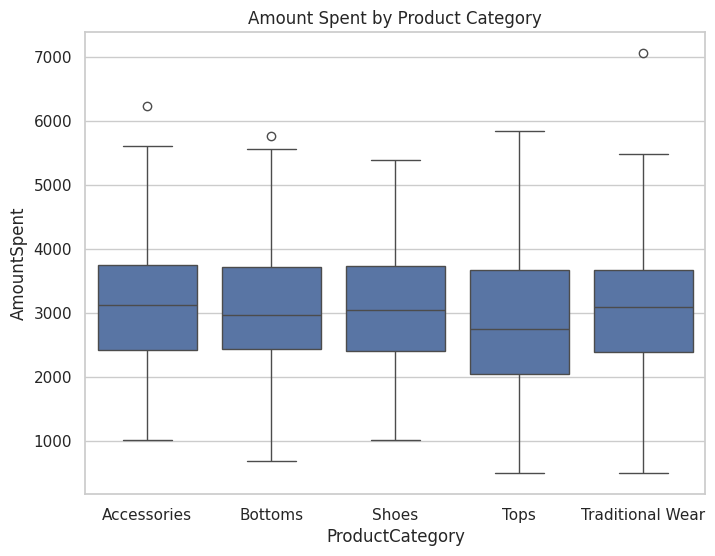

In [ ]:
##AmountSpent vs ProductCategory

plt.figure(figsize=(8,6))
sns.boxplot(x='ProductCategory', y='AmountSpent', data=df)
plt.title('Amount Spent by Product Category')
plt.show()

Spending is relatively consistent across categories in terms of median.

Tops show the greatest variation in spending.

Traditional Wear and Shoes have slightly higher typical spending.

Outliers in Accessories and Bottoms indicate some big spenders, but the bulk of customers remain around the median.

Perform Statistical Hypothesis Testing:
1. Is there a relationship between Gender and Returned?
2. Is there a significant difference in AmountSpent between Male and Female customers?
3. Does AmountSpent differ significantly across Membership levels?

Relationship between gender and returned(chi-square test)

H₀ (Null): Gender and Returned are independent.

H₁ (Alt): Gender and Returned are associated.

In [ ]:
# Relationship between gender and returned
import scipy.stats as stats
import pandas as pd
# Cross-tabulation
contingency_table = pd.crosstab(df['Gender'], df['Returned'])

# Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi2 = {chi2}, p-value = {p}")

Chi2 = 0.2186834952635056, p-value = 0.8964240143609901


As p-value= 0.896 >0.05, so we can't reject the null hypothesis. So, gender and returned are independent, there is no relationship between them.

Difference in AmountSpent Between Male and Female (Independent Samples t-test)

H₀: No difference in mean AmountSpent between Male and Female.

H₁: There is a difference in mean AmountSpent.

In [ ]:
male_spent = df[df['Gender'] == 'Male']['AmountSpent']
female_spent = df[df['Gender'] == 'Female']['AmountSpent']

# t-test
t_stat, p_val = stats.ttest_ind(male_spent, female_spent, equal_var=False)  # Welch's t-test

print(f"T-statistic = {t_stat}, p-value = {p_val}")


T-statistic = 0.38253732733502216, p-value = 0.7021533757701697


As p-value = 0.702 which is greater than 0.05, which means we can't reject null hypothesis. So, there is no difference in mean AmountSpent between male and female.

Difference in AmountSpent Across Membership Levels (ANOVA)

H₀: Mean AmountSpent is the same across all Membership levels.

H₁: At least one group differs significantly.

In [ ]:
from scipy.stats import f_oneway

groups = [group['AmountSpent'].values for name, group in df.groupby('Membership')]

f_stat, p_value = f_oneway(*groups)

print(f"F-statistic = {f_stat}, p-value = {p_value}")


F-statistic = 1.9490009303279352, p-value = 0.12003272655215201


/tmp/ipython-input-36-2372901489.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['AmountSpent'].values for name, group in df.groupby('Membership')]


As p-value= 0.12 > 0.05, we may not reject the null hypothesis. This means, there is no different spending habit in members.

Multiple Linear Regression Analysis:
 Predict AmountSpent using independent variables such as:
 Age, AnnualIncome, ItemsPurchased, Membership, Gender, etc.    

Include:
Regression coefficients
R-squared value
Residual plots and model assumptions
Interpretation of coefficients and model quality